# Appendix - The Relationship between Death and Economic Growth
#### **by Michelle D. Davies (mdd94)**, Spring 2021, INFO 2950

### The Data Collection and Cleaning Process
1. **Downloading the Data** - I had to download the existing datasets from the World Bank's data dashboard and from the WHO's data collection tools. Some were downlaoded as *.csv* and others as a *.text* file.
2. **Identifying the Required Columns and Unique ID Column** - In the **Data Description** subsection, I created a table of all the columns that I plan to pull from these datasets to make up my data and analysis. For example, the Country Code column is the main Unique Identifier ("UID") because all of this data varies by country, and no two countries can have the same country code. Other data, like the cause of death and GDP growth rate, are the fundamental data groups of this entire project, so those must be included. The other columns allow for a more in depth analysis by fostering a conversation about who is being affected by these causes of death, and speculation on why. These are data series that are coming from multiple different sets, which leads me to my next step.
3. **Extract required columns from each dataset** - Now that I have identified what columns I need and what I will use them for, I will use pandas to extract dataframes from each dataset consisting of the columns that I need for this project.
4. **Consolidating the data on Year vs. GDP from the *GDP Percent by Year* dataset** - For the *GDP Percent by Year* dataset, I have to perform one extra step, which is to reformat the data into a form that better aligns with the rest of the data columns. In its raw form, this dataset has the years as columns and the data (% GDP in this case) in the rows by country, while every other dataset that I am working with has the years in a column, with data on the same index in a different column.
5. **Format these extracted columns** - I aligned these columns such that all of the series data match up with the Country Code and year columns.
6. **Rename the columns** - As the second-to-last step of my data collection and cleaning process, I will rename the columns to more intuitive, coding-friendly names.
7. **Merging the Country Codes dataset with the economic_growth dataset** - To make it easier to identify with countries correspond with which codes, I merged the DataFrame that defines the codes to the economic_growth dataset.
8. **Filter data to only include those that overlap between the [death] and [economic_growth] datasets, and don't have NaN values** - In order to get the most out of my data, I only chose to leave countries in the dataset that I can get full data for every year from both [death] and [economic_growth]. This choice leads to a lot of compelling data from countries with rich stores being excluded, but it also puts all of the data I do feature on an even playing field for my analysis, so that is a tradeoff that I am willing to make.
9. **Only exploring the top 6 countries in terms of total number of deaths in this time period** - There is a lot of data to look at (even after filtering) and I don't have time to explore every country, so I elected to explore the 6 countries that reported the most total deaths between 1999 and 2012. This is for a couple reasons, chief of which being that (1) these 6 countries reported ~97% percent of the deaths documented with the WHO, so these countries contribute so heavily to the overall pattern that other countries' contributions to this data are significant dwarfed, and i hypothesize that the reason why could be a compelling angle for me to explore and (2) the group of countries that reported the most deaths are scattered very evenly throughout the ranks of countries from richest to poorest, and are in (mostly) different ethnic regions of the world so there is a compelling enough variety in the data that I would have for the economic growth aspect that it doesn't warrent expanding my set.
10. **Save the new dataframe to a CSV file** - Finally, I will write this new dataframe that I have put together to a new .csv file so that I can work off of that copy rather than repeat this process everytime since there are multiple sets involved.

#### Raw Data Source:
All of my datasets (in .csv format) is hosted on Cornell Box, and can be accessed via the following link: https://cornell.box.com/s/l6bqykcvstk3krfvn87kwkoxbp3p8pon

#### Columns in The DataFrames

| Column | Description | DataFrame / Original Dataset | Nickname & Table (N/A if using given variable name) | Notes |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Country Name | The full name of each country. | GDP Percent Growth by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "country" | For Readability purposes for those who are not familiar with the 3-Letter system. |
| Country (Code) | The 4-digit number code for each country. | *Included in all datasets* | "country_id" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. |
| <Year 1999-2019, Each Column's name is a given year in this range> | Year to which data refer. | GDP Percent Growth by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | N/A - Entries will be consolidated. | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from  *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)*. |
| GDP Growth Rate | The growth rate that countries experiened in a given year. | GDP Percent Growth by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "gdp_growth_rate" | Data from the original set's rows will be reorganized into it's own column. |
| Year | Year to which data refer. | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "year" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from *API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv* |
| List | List of ICD revision used (7, 8, 9, or 10). | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "icd_rev_code" |             |
| Cause | Cause of death. | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "death_cause" |             |
| Sex | Predominant sex of thse who have passed. | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "bio_sex" | 1 = male, 2 = female |
| Deaths1 | Deaths at all ages. | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "all_ages_deaths" |             |
| Frmt1 | Age groups for victims. | Death *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "age_group_def" |             |

#### Row in DataFrames

The rows in the `economic_growth` DataFrame show the rates of growth for each country for every year in the specified time period, while the rows in the `death` DataFrame show the statistics in the following hierarchy:

            1. Country
                2. Year that data is from
                    3. Classification of ICD
                        4. Death Cause
                            5. Biological Sex
                                6. Age Group of Victims
                                    7. Number of Deaths (dependent on previous classifications)

#### Causes of Death - Code Key
1. *C001 - All causes* - *Filtered to see scale of other causes*
2. *AAA - All misc. cases in total* - *Filtered to see scale of other causes*
3. C041 - Diseases of the circulatory system
4. C021 - Neoplasms
5. C022 - Malignant neoplasms
6. C052 - Disease of the respiratory system
7. C051 - Cerebrovascular disease
8. C054 - Bronchitis, chronic and unspecified emphysema and asthma
9. C043 - Heart diseases
10. C089 - External causes of injury and poisoning
11. C028 - Mal. neoplasm of trachea, bronchus and lung
12. C056 - Disease of digestive system
13. C047 - Other ischaemic heart disease
14. C027 - Mal. neoplasm of liver
15. B00 - Remainder of certain infectious and parasitic diseases
16. C025 - Mal. neoplasm of stomach
17. C046 - Acute myocardial infarction
18. C048 - Pulmonary heart disease

#### Age Group Definitions
| Group Code | Definition |
|------------|------------|
| 00 | Ages 1 to 10 |
| 01 | Ages 10 to 15 |
| 02 | Ages 15 to 20 |
| 03 | Ages 20 to 30 |
| 04 | Ages 40 to 50 |
| 05 | Ages 50 to 60 |
| 06 | Ages 60 to 70 |
| 07 | Ages 70 to 80 |
| 08 | Ages 80 to 90 |
| 09 | Ages 90+ |

## Data

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
# Load Datasets
death = pd.read_csv('death.csv')
economic_growth = pd.read_csv('economic_growth.csv')

### Economic Growth Dataset

In [3]:
if 'Unnamed: 0' in economic_growth.columns:
    economic_growth = economic_growth.drop(columns=["Unnamed: 0"], axis=1)
#economic_growth.to_csv('economic_growth.csv')

In [4]:
economic_growth # run to view

country_id         country      1999      2000      2001      2002  \
0        5020       Australia  5.073599  3.933137  1.930858  4.001404   
1        3068           China  7.661652  8.490093  8.335733  9.133631   
2        5070            Fiji  8.799999 -1.699998  2.000000  3.199999   
3        4308  United Kingdom  3.428223  3.437472  2.974364  2.324351   
4        4240        Portugal  3.906577  3.816178  1.943672  0.770924   
5        4335      Uzbekistan  4.300000  3.835000  4.163838  3.973488   

        2003       2004       2005       2006       2007      2008      2009  \
0   2.985934   4.055452   3.204270   2.794537   3.844230  3.657954  1.936994   
1  10.038030  10.113621  11.394592  12.720956  14.230861  9.650679  9.398726   
2   0.999999   5.300000   0.700000   1.852484  -0.850654  1.032794 -1.386038   
3   3.286378   2.373951   3.179729   2.788325   2.430553 -0.281154 -4.247822   
4  -0.930521   1.788736   0.781848   1.625034   2.506580  0.319248 -3.122079   
5   4.232627   7.449001   6.950007   7.451418   9.473005  9.029161  8.050933   

        2010      2011      2012  
0   2.067417  2.462756  2.160956  
1  10.635871  9.550832  6.110118  
2   2.954672  2.705143 -0.445335  
3   1.949521  1.540147  1.462658  
4   1.737625 -1.696165  2.235977  
5   7.597168  7.784906  5.563724

In [5]:
economic_growth.dtypes # run to view

country_id      int64
country        object
1999          float64
2000          float64
2001          float64
2002          float64
2003          float64
2004          float64
2005          float64
2006          float64
2007          float64
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
dtype: object

### Death Statistics Dataset

In [6]:
if 'Unnamed: 0' in death.columns:
    death = death.drop(columns=["Unnamed: 0"], axis=1)
#death.to_csv('death.csv')

In [7]:
death # run to view

country_id  year icd_rev_code death_cause  bio_sex  age_group_def  \
0          4240  1999          09B         B00        1              1   
1          4240  1999          09B         B00        2              1   
2          4240  2000          09B         B00        1              1   
3          4240  2000          09B         B00        2              1   
4          4240  2001          09B         B00        1              0   
..          ...   ...          ...         ...      ...            ...   
258        5020  2012          104        C051        2              0   
259        5020  2012          104        C052        1              0   
260        5020  2012          104        C089        1              0   
261        5020  2012          104        C089        2              0   
262        5070  2011          104        C089        1              0   

     all_ages_deaths  
0              56471  
1              51797  
2              55346  
3              50467  
4              55189  
..               ...  
258                3  
259                2  
260                3  
261                3  
262                1  

[263 rows x 7 columns]

In [8]:
death.dtypes # run to view

country_id          int64
year                int64
icd_rev_code       object
death_cause        object
bio_sex             int64
age_group_def       int64
all_ages_deaths     int64
dtype: object

### Data Profile

#### Prominent Causes of Death for Each Country, by Year
First, I want to not only look at the total deaths in each of these countries, but also which causes of death, of the top global ones I have listed above, were the most prominent causes of death for each country in each year. In this graphs, I am formatting the data to also distinguish age groups and biological sexes of the victims by styling. 

Much of this data from [death] is very categorical, and so there will be many graphs here.

In [9]:
# Run to view the plot of death by country (code) over the time period
plt.figure(figsize=(16,8))
death.groupby('country_id').all_ages_deaths.sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Number of Deaths by Numeric Country Codes, Issued by the WHO')
plt.xlabel('Total Number of Deaths (Millions)')
plt.ylabel('Country Code')
plt.show()

In descending order, the most deaths during this time period occured in:
1. China
2. The United Kingdom
3. Australia
4. Uzbekistan
5. Portugal
6. Fiji

Let's take a look at the distribution of the causes of death were in each country:

In [10]:
# Separate data by country
death_aus = death.loc[death["country_id"] == 5020]
death_cn = death.loc[death["country_id"] == 3068]
death_fji = death.loc[death["country_id"] == 5070]
death_uk = death.loc[death["country_id"] == 4308]
death_por = death.loc[death["country_id"] == 4240]
death_uzb = death.loc[death["country_id"] == 4335]

In [11]:
#China Data
g_cn = sns.catplot(
    data=death_cn, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_cn.despine(left=True)
g_cn.set_axis_labels("Year", "Number of Deaths")
g_cn.legend.set_title("Number of Deaths in China")

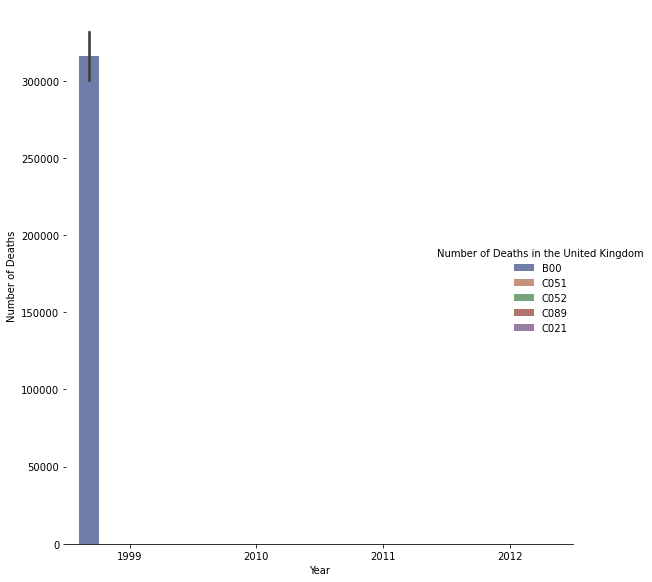

In [12]:
#UK Data
g_uk = sns.catplot(
    data=death_uk, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_uk.despine(left=True)
g_uk.set_axis_labels("Year", "Number of Deaths")
g_uk.legend.set_title("Number of Deaths in the United Kingdom")

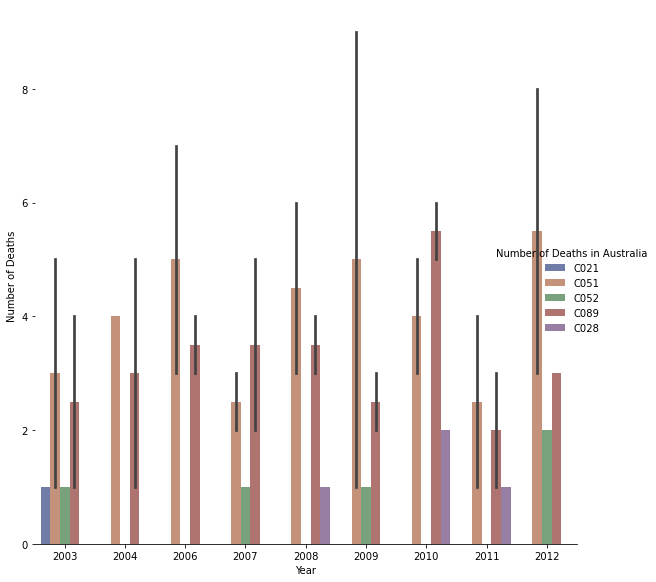

In [13]:
#Australia Data
g_aus = sns.catplot(
    data=death_aus, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_aus.despine(left=True)
g_aus.set_axis_labels("Year", "Number of Deaths")
g_aus.legend.set_title("Number of Deaths in Australia")

In [14]:
#Uzbekistan Data
g_uzb = sns.catplot(
    data=death_uzb, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_uzb.despine(left=True)
g_uzb.set_axis_labels("Year", "Number of Deaths")
g_uzb.legend.set_title("Number of Deaths in the Uzbekistan")

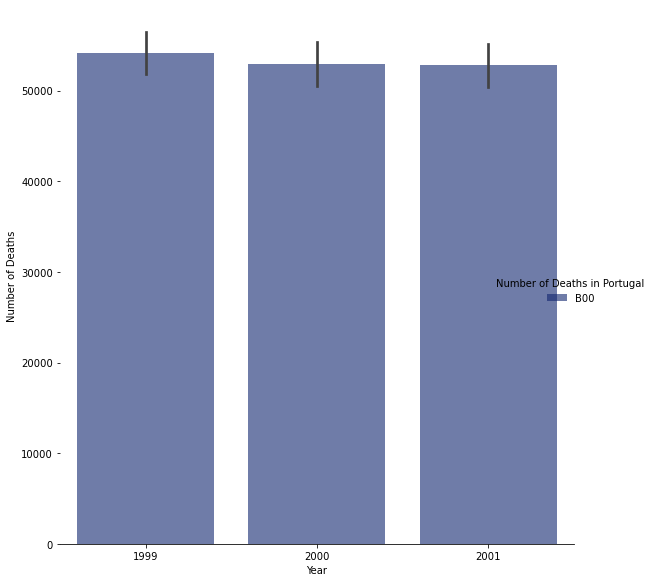

In [15]:
#Portugal Data
g_por = sns.catplot(
    data=death_por, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_por.despine(left=True)
g_por.set_axis_labels("Year", "Number of Deaths")
g_por.legend.set_title("Number of Deaths in Portugal")

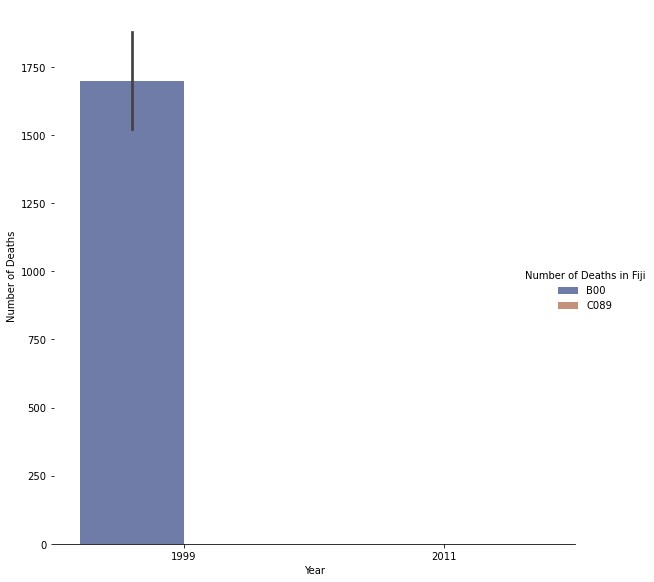

In [16]:
#Fiji Data
g_fji = sns.catplot(
    data=death_fji, kind="bar",
    x="year", y="all_ages_deaths", hue="death_cause",
    ci="sd", palette="dark", alpha=.6, height=8
)
g_fji.despine(left=True)
g_fji.set_axis_labels("Year", "Number of Deaths")
g_fji.legend.set_title("Number of Deaths in Fiji")

One of my first observations about my data is that even though there are values for every single cause of death for every country in this dataset for every year in the specified range, some causes of death, like the *general group of infectious diseases*, completely dwarf other causes of death in certain years, so much so that some years don't even show up on the graph, and one can't see most of the other causes of death on years that do show up. This might be interesting to explore more for my first Preregistered Analysis statement. But for now, I want to take a look at the trends in economic growth in these countries.

#### Trends in Economic Growth for Each Country, by Year
Now, I want to establish the corresponding levels of economic growth for each country, by year. This can be more easily graphed on one set of axes.

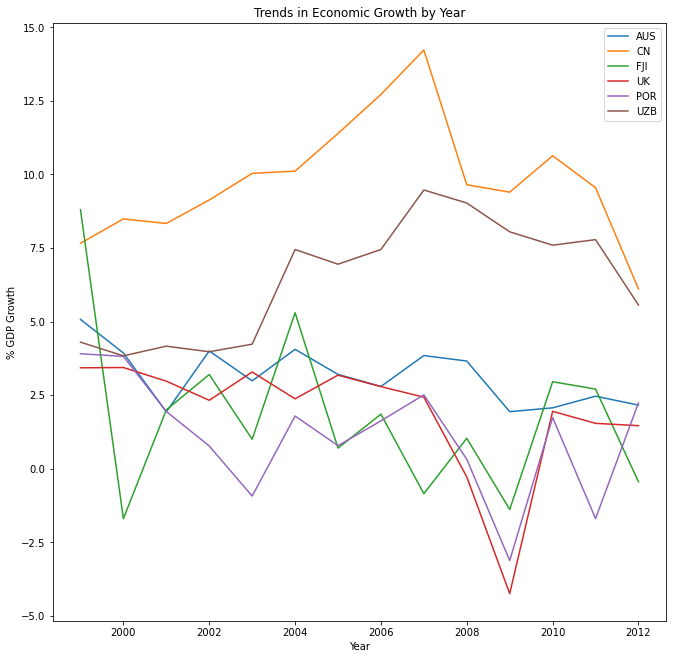

In [17]:
plt.figure(figsize=(11,11))
x = [x for x in range(1999, 2013)]
# plotting the Australia points 
y1 = []
for year in x:
    y1.append(economic_growth.loc[economic_growth["country"] == "Australia", str(year)])
plt.plot(x, y1, label = "AUS")
# plotting the China points 
y2 = []
for year in x:
    y2.append(economic_growth.loc[economic_growth["country"] == "China", str(year)])
plt.plot(x, y2, label = "CN")
# plotting the Fiji points 
y3 = []
for year in x:
    y3.append(economic_growth.loc[economic_growth["country"] == "Fiji", str(year)])
plt.plot(x, y3, label = "FJI")
# plotting the UK points 
y4 = []
for year in x:
    y4.append(economic_growth.loc[economic_growth["country"] == "United Kingdom", str(year)])
plt.plot(x, y4, label = "UK")
# plotting the Portugal points 
y5 = []
for year in x:
    y5.append(economic_growth.loc[economic_growth["country"] == "Portugal", str(year)])
plt.plot(x, y5, label = "POR")
# plotting the Uzbekistan points 
y6 = []
for year in x:
    y6.append(economic_growth.loc[economic_growth["country"] == "Uzbekistan", str(year)])
plt.plot(x, y6, label = "UZB")
plt.xlabel('Year')
# Set the y axis label of the current axis.
plt.ylabel('% GDP Growth')
# Set a title of the current axes.
plt.title('Trends in Economic Growth by Year')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

Based on this graph, characteristics that I will be examining when I do my analysis are the peaks and troughs of each of the curves and what year these occured so that I can look for a correspondance with the most prominent causes of death for each country in those years.

In [2]:
#### Data Collection, Cleaning and Consolidating
### Import modules
import os
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

#### Country Codes

In [14]:
### Clean up Columns
codesNum = pd.read_csv("country_codes.csv", sep=',', header=None, engine='python')
## Country Codes
codesNum.columns = ["country_id", "country"]
codesNum.index = codesNum.country_id
codesNum = codesNum.drop(index=["country_id"]) # formatting error in export
codesNum = codesNum.drop(columns=["country_id"]) # formatting error in export
# send to csv file
codesNum.to_csv('country_code_key.csv')
print("Country Codes")
codesNum

Country Codes


country
country_id                 
1010                Algeria
1020                 Angola
1025                  Benin
1030               Botswana
1035           Burkina Faso
...                     ...
5197                  Samoa
5198        Solomon Islands
5200                  Tonga
5205                 Tuvalu
5207                Vanuatu

[227 rows x 1 columns]

#### Mortality Data

In [3]:
## load data for mortality.
mortIDC7 = pd.read_csv("MortICD7.csv", sep=',', header=None, engine='python')
mortIDC8 = pd.read_csv("MortICD8.csv", sep=',', header=None, engine='python')
mortIDC9 = pd.read_csv("MortICD9.csv", sep=',', header=None, engine='python')
mortIDC10_p1 = pd.read_csv("MortICD10_part1.csv", sep=',', header=None, engine='python')
mortIDC10_p2 = pd.read_csv("MortICD10_part2.csv", sep=',', header=None, engine='python')
mortIDC10_p3 = pd.read_csv("MortICD10_part3.csv", sep=',', header=None, engine='python')
mortIDC10_p4 = pd.read_csv("MortICD10_part4.csv", sep=',', header=None, engine='python')
mortIDC10_p5 = pd.read_csv("MortICD10_part5.csv", sep=',', header=None, engine='python')

## Mortality ICD Data
mortIDC7 = mortIDC7.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC7 = mortIDC7.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC7.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC7 = mortIDC7.drop(index=[0]) # formatting error in export
mortIDC7.head(n=10)
mortIDC8 = mortIDC8.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC8 = mortIDC8.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC8.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC8 = mortIDC8.drop(index=[0]) # formatting error in export
mortIDC8.head(n=10)
mortIDC9 = mortIDC9.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC9 = mortIDC9.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC9.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC9 = mortIDC9.drop(index=[0]) # formatting error in export
mortIDC9.head(n=10)
mortIDC10_p1 = mortIDC10_p1.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p1 = mortIDC10_p1.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p1.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p1 = mortIDC10_p1.drop(index=[0]) # formatting error in export
mortIDC10_p1.head(n=10)
mortIDC10_p2 = mortIDC10_p2.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p2 = mortIDC10_p2.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p2.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p2 = mortIDC10_p2.drop(index=[0]) # formatting error in export
mortIDC10_p2.head(n=10)
mortIDC10_p3 = mortIDC10_p3.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p3 = mortIDC10_p3.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p3.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p3 = mortIDC10_p3.drop(index=[0]) # formatting error in export
mortIDC10_p3.head(n=10)
mortIDC10_p4 = mortIDC10_p4.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p4 = mortIDC10_p4.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p4.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p4 = mortIDC10_p4.drop(index=[0]) # formatting error in export
mortIDC10_p4.head(n=10)
mortIDC10_p5 = mortIDC10_p5.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p5 = mortIDC10_p5.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p5.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p5 = mortIDC10_p5.drop(index=[0]) # formatting error in export
mortIDC10_p5.head(n=10)
# COMBINE DataFrame
mortality = mortIDC7.copy()
mortality = mortality.combine_first(mortIDC8)
mortality = mortality.combine_first(mortIDC9)
mortality = mortality.combine_first(mortIDC10_p1)
mortality = mortality.combine_first(mortIDC10_p2)
mortality = mortality.combine_first(mortIDC10_p3)
mortality = mortality.combine_first(mortIDC10_p4)
mortality = mortality.combine_first(mortIDC10_p5)
mortality.index = mortality.country_id
mortality = mortality.drop(columns=["country_id"])
mortality = mortality.where(mortality['year'] != "NaN")
mortality.sort_values(by=['year'])
mortality.to_csv('mortality_data.csv')
# show
print("Mortality Data")
mortality

Mortality Data


year icd_rev_code death_cause bio_sex age_group_def  \
country_id                                                        
1125        1955          07A        A000       1             1   
1125        1955          07A        A000       2             1   
1125        1955          07A        A001       1             1   
1125        1955          07A        A001       2             1   
1125        1955          07A        A002       1             1   
...          ...          ...         ...     ...           ...   
5150        2012          104        Y871       1             0   
5150        2012          104        Y872       1             0   
5150        2012          104        Y881       2             0   
5150        2012          104        Y883       1             0   
5150        2012          104        Y883       2             0   

           all_ages_deaths  
country_id                  
1125                107822  
1125                105750  
1125                  1302  
1125                   739  
1125                    69  
...                    ...  
5150                     1  
5150                     1  
5150                     1  
5150                     2  
5150                     7  

[1044418 rows x 6 columns]

Below this, I had to rescrub my dataset offline to have much less than a million rows, since I didn't need most of the years.

In [ ]:
mort = pd.read_csv("mortality_data.csv", sep=',', header=None, engine='python')
mort.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mort.index = mort["country_id"]
mort = mort.drop(columns=["country_id"], axis=1) # formatting error in export
mort = mort.drop(index=["country_id"], axis=0) # formatting error in export
for i in range(1955,1999):
    mort.drop(index=mort.index.where(mort["year"] == i), inplace = True)
mort.to_csv('mortality_data.csv')
mort

#### Economic Growth

In [25]:
## GDP Percent by Year
gdp_percent_by_year = pd.read_csv("gdp_growthrate.csv", sep=',', header=None, engine='python')
gdp_percent_by_year.drop(index=[0, 1, 2, 3, 4], axis=0, inplace=True)
gdp_percent_by_year.drop(columns=[1, 2, 3, 64], axis=1, inplace=True)
gdp_percent_by_year.drop(columns=[x for x in range(4, 43)], axis=1, inplace=True)
gdp_percent_by_year.drop(columns=[x for x in range(56, 63)], axis=1, inplace=True)
gdp_growthby_year = gdp_percent_by_year.copy()
gdp_growthby_year.columns = ["country"] + [y for y in range(1999,2013)]
#x = [i for i in codesNum["country"] if i not in gdp_growthby_year]
gdp_growthby_year.index = gdp_growthby_year["country"]
gdp_growthby_year.drop(columns=["country"], axis=1, inplace=True)
for i in range(1999,2013):
    gdp_growthby_year.drop(gdp_growthby_year.index[gdp_growthby_year[i].isnull() == True], inplace = True)
gdp_growthby_year = gdp_growthby_year.merge(codesNum, on='country', left_index=True)
gdp_growthby_year.to_csv('gdp_trends_by_year.csv')
print("Economic Growth")
gdp_growthby_year

Economic Growth


country       1999       2000      2001       2002  \
country_id                                                                    
1020                      Angola   2.181490   3.054624  4.205999  13.665687   
4005                     Albania  12.889897   6.950036  8.290070   4.539961   
4008                     Andorra   4.099081   3.528361  8.119358   4.546362   
3405        United Arab Emirates   2.902214  10.852704  1.399085   2.433457   
2020                   Argentina  -3.385457  -0.788999 -4.408840 -10.894485   
...                          ...        ...        ...       ...        ...   
5207                     Vanuatu   0.337293   5.924809 -3.397582  -5.198319   
5197                       Samoa   2.185433   6.918794  6.939762   4.343996   
1430                South Africa   2.399996   4.200003  2.699995   3.700382   
1560                      Zambia   4.650190   3.897323  5.316868   4.506014   
1570                    Zimbabwe  -0.817821  -3.059190  1.439615  -8.894024   

                 2003       2004       2005       2006       2007       2008  \
country_id                                                                     
1020         2.989850  10.952862  15.028915  11.547683  14.010018  11.166138   
4005         5.530051   5.509999   5.529915   5.900084   5.979982   7.499970   
4008         8.694204   8.135676   5.397796   4.808689   1.553188  -5.559186   
3405         8.800541   9.566437   4.855141   9.837320   3.184390   3.191836   
2020         8.837041   9.029573   8.851660   8.047152   9.007651   4.057233   
...               ...        ...        ...        ...        ...        ...   
5207         4.288335   3.987393   5.305326   8.465160   5.173513   6.448521   
5197         4.515482   4.625001   4.156490   1.968808   6.322645   1.009088   
1430         2.949079   4.554553   5.277056   5.603798   5.360476   3.191047   
1560         6.944974   7.032395   7.235599   7.903694   8.352436   7.773896   
1570       -16.995075  -5.807538  -5.711084  -3.461495  -3.653327 -17.668946   

                 2009       2010       2011      2012  
country_id                                             
1020         0.858713   4.403933   3.471976 -0.624644  
4005         3.350067   3.706892   2.545322  2.240070  
4008        -5.302847  -1.974958  -0.008070  1.849238  
3405        -5.242922   1.602810   6.930272  1.677720  
2020        -5.918525  10.125398   6.003952 -2.088015  
...               ...        ...        ...       ...  
5207         3.312816   1.629082   1.223226  3.264590  
5197        -4.808274   0.479159   4.173393  3.580626  
1430        -1.538089   3.039731   3.284168  0.152583  
1560         9.220348  10.298223   5.564602  1.441785  
1570        12.019560  19.675323  14.193913 -8.100000  

[154 rows x 15 columns]

### Data Description

| Column | Description | Original Dataset | Nickname (N/A if using given variable name) | Notes |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Country Name | The full name of each country. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "country" | For Readability purposes for those who are not familiar with the 3-Letter system. |
| Country (Code) | The 4-digit number code for each country. | *Included in all datasets* | "country_id" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. |
| <Year 1999-2019, Each Column's name is a given year in this range> | Year to which data refer. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | N/A - Entries will be consolidated. | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from  *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)*. |
| GDP Growth Rate | The growth rate that countries experiened in a given year. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "gdp_growth_rate" | Data from the original set's rows will be reorganized into it's own column. |
| Year | Year to which data refer. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "year" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from *API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv* |
| List | List of ICD revision used (7, 8, 9, or 10). | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "icd_rev_code" |             |
| Cause | Cause of death. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "death_cause" |             |
| Sex | Predominant sex of thse who have passed. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "bio_sex" | 1 = male, 2 = female |
| Deaths1 | Deaths at all ages. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "all_ages_deaths" |             |

## Exploratory Data Analysis

In [2]:
#### Data Collection, Cleaning and Consolidating
### Import modules
import os
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

#### Country Codes

In [14]:
### Clean up Columns
codesNum = pd.read_csv("country_codes.csv", sep=',', header=None, engine='python')
## Country Codes
codesNum.columns = ["country_id", "country"]
codesNum.index = codesNum.country_id
codesNum = codesNum.drop(index=["country_id"]) # formatting error in export
codesNum = codesNum.drop(columns=["country_id"]) # formatting error in export
# send to csv file
codesNum.to_csv('country_code_key.csv')
print("Country Codes")
codesNum

Country Codes


country
country_id                 
1010                Algeria
1020                 Angola
1025                  Benin
1030               Botswana
1035           Burkina Faso
...                     ...
5197                  Samoa
5198        Solomon Islands
5200                  Tonga
5205                 Tuvalu
5207                Vanuatu

[227 rows x 1 columns]

#### Mortality Data

In [3]:
## load data for mortality.
mortIDC7 = pd.read_csv("MortICD7.csv", sep=',', header=None, engine='python')
mortIDC8 = pd.read_csv("MortICD8.csv", sep=',', header=None, engine='python')
mortIDC9 = pd.read_csv("MortICD9.csv", sep=',', header=None, engine='python')
mortIDC10_p1 = pd.read_csv("MortICD10_part1.csv", sep=',', header=None, engine='python')
mortIDC10_p2 = pd.read_csv("MortICD10_part2.csv", sep=',', header=None, engine='python')
mortIDC10_p3 = pd.read_csv("MortICD10_part3.csv", sep=',', header=None, engine='python')
mortIDC10_p4 = pd.read_csv("MortICD10_part4.csv", sep=',', header=None, engine='python')
mortIDC10_p5 = pd.read_csv("MortICD10_part5.csv", sep=',', header=None, engine='python')

## Mortality ICD Data
mortIDC7 = mortIDC7.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC7 = mortIDC7.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC7.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC7 = mortIDC7.drop(index=[0]) # formatting error in export
mortIDC7.head(n=10)
mortIDC8 = mortIDC8.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC8 = mortIDC8.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC8.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC8 = mortIDC8.drop(index=[0]) # formatting error in export
mortIDC8.head(n=10)
mortIDC9 = mortIDC9.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC9 = mortIDC9.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC9.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC9 = mortIDC9.drop(index=[0]) # formatting error in export
mortIDC9.head(n=10)
mortIDC10_p1 = mortIDC10_p1.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p1 = mortIDC10_p1.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p1.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p1 = mortIDC10_p1.drop(index=[0]) # formatting error in export
mortIDC10_p1.head(n=10)
mortIDC10_p2 = mortIDC10_p2.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p2 = mortIDC10_p2.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p2.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p2 = mortIDC10_p2.drop(index=[0]) # formatting error in export
mortIDC10_p2.head(n=10)
mortIDC10_p3 = mortIDC10_p3.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p3 = mortIDC10_p3.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p3.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p3 = mortIDC10_p3.drop(index=[0]) # formatting error in export
mortIDC10_p3.head(n=10)
mortIDC10_p4 = mortIDC10_p4.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p4 = mortIDC10_p4.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p4.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p4 = mortIDC10_p4.drop(index=[0]) # formatting error in export
mortIDC10_p4.head(n=10)
mortIDC10_p5 = mortIDC10_p5.drop(columns=[x for x in range(10,39)]) # formatting error in export
mortIDC10_p5 = mortIDC10_p5.drop(columns=[1, 2, 8]) # formatting error in export
mortIDC10_p5.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mortIDC10_p5 = mortIDC10_p5.drop(index=[0]) # formatting error in export
mortIDC10_p5.head(n=10)
# COMBINE DataFrame
mortality = mortIDC7.copy()
mortality = mortality.combine_first(mortIDC8)
mortality = mortality.combine_first(mortIDC9)
mortality = mortality.combine_first(mortIDC10_p1)
mortality = mortality.combine_first(mortIDC10_p2)
mortality = mortality.combine_first(mortIDC10_p3)
mortality = mortality.combine_first(mortIDC10_p4)
mortality = mortality.combine_first(mortIDC10_p5)
mortality.index = mortality.country_id
mortality = mortality.drop(columns=["country_id"])
mortality = mortality.where(mortality['year'] != "NaN")
mortality.sort_values(by=['year'])
mortality.to_csv('mortality_data.csv')
# show
print("Mortality Data")
mortality

Mortality Data


year icd_rev_code death_cause bio_sex age_group_def  \
country_id                                                        
1125        1955          07A        A000       1             1   
1125        1955          07A        A000       2             1   
1125        1955          07A        A001       1             1   
1125        1955          07A        A001       2             1   
1125        1955          07A        A002       1             1   
...          ...          ...         ...     ...           ...   
5150        2012          104        Y871       1             0   
5150        2012          104        Y872       1             0   
5150        2012          104        Y881       2             0   
5150        2012          104        Y883       1             0   
5150        2012          104        Y883       2             0   

           all_ages_deaths  
country_id                  
1125                107822  
1125                105750  
1125                  1302  
1125                   739  
1125                    69  
...                    ...  
5150                     1  
5150                     1  
5150                     1  
5150                     2  
5150                     7  

[1044418 rows x 6 columns]

Below this, I had to rescrub my dataset offline to have much less than a million rows, since I didn't need most of the years.

In [ ]:
mort = pd.read_csv("mortality_data.csv", sep=',', header=None, engine='python')
mort.columns = ["country_id", "year", "icd_rev_code", "death_cause", "bio_sex", "age_group_def", "all_ages_deaths"]
mort.index = mort["country_id"]
mort = mort.drop(columns=["country_id"], axis=1) # formatting error in export
mort = mort.drop(index=["country_id"], axis=0) # formatting error in export
for i in range(1955,1999):
    mort.drop(index=mort.index.where(mort["year"] == i), inplace = True)
mort.to_csv('mortality_data.csv')
mort

#### Economic Growth

In [25]:
## GDP Percent by Year
gdp_percent_by_year = pd.read_csv("gdp_growthrate.csv", sep=',', header=None, engine='python')
gdp_percent_by_year.drop(index=[0, 1, 2, 3, 4], axis=0, inplace=True)
gdp_percent_by_year.drop(columns=[1, 2, 3, 64], axis=1, inplace=True)
gdp_percent_by_year.drop(columns=[x for x in range(4, 43)], axis=1, inplace=True)
gdp_percent_by_year.drop(columns=[x for x in range(56, 63)], axis=1, inplace=True)
gdp_growthby_year = gdp_percent_by_year.copy()
gdp_growthby_year.columns = ["country"] + [y for y in range(1999,2013)]
#x = [i for i in codesNum["country"] if i not in gdp_growthby_year]
gdp_growthby_year.index = gdp_growthby_year["country"]
gdp_growthby_year.drop(columns=["country"], axis=1, inplace=True)
for i in range(1999,2013):
    gdp_growthby_year.drop(gdp_growthby_year.index[gdp_growthby_year[i].isnull() == True], inplace = True)
gdp_growthby_year = gdp_growthby_year.merge(codesNum, on='country', left_index=True)
gdp_growthby_year.to_csv('gdp_trends_by_year.csv')
print("Economic Growth")
gdp_growthby_year

Economic Growth


country       1999       2000      2001       2002  \
country_id                                                                    
1020                      Angola   2.181490   3.054624  4.205999  13.665687   
4005                     Albania  12.889897   6.950036  8.290070   4.539961   
4008                     Andorra   4.099081   3.528361  8.119358   4.546362   
3405        United Arab Emirates   2.902214  10.852704  1.399085   2.433457   
2020                   Argentina  -3.385457  -0.788999 -4.408840 -10.894485   
...                          ...        ...        ...       ...        ...   
5207                     Vanuatu   0.337293   5.924809 -3.397582  -5.198319   
5197                       Samoa   2.185433   6.918794  6.939762   4.343996   
1430                South Africa   2.399996   4.200003  2.699995   3.700382   
1560                      Zambia   4.650190   3.897323  5.316868   4.506014   
1570                    Zimbabwe  -0.817821  -3.059190  1.439615  -8.894024   

                 2003       2004       2005       2006       2007       2008  \
country_id                                                                     
1020         2.989850  10.952862  15.028915  11.547683  14.010018  11.166138   
4005         5.530051   5.509999   5.529915   5.900084   5.979982   7.499970   
4008         8.694204   8.135676   5.397796   4.808689   1.553188  -5.559186   
3405         8.800541   9.566437   4.855141   9.837320   3.184390   3.191836   
2020         8.837041   9.029573   8.851660   8.047152   9.007651   4.057233   
...               ...        ...        ...        ...        ...        ...   
5207         4.288335   3.987393   5.305326   8.465160   5.173513   6.448521   
5197         4.515482   4.625001   4.156490   1.968808   6.322645   1.009088   
1430         2.949079   4.554553   5.277056   5.603798   5.360476   3.191047   
1560         6.944974   7.032395   7.235599   7.903694   8.352436   7.773896   
1570       -16.995075  -5.807538  -5.711084  -3.461495  -3.653327 -17.668946   

                 2009       2010       2011      2012  
country_id                                             
1020         0.858713   4.403933   3.471976 -0.624644  
4005         3.350067   3.706892   2.545322  2.240070  
4008        -5.302847  -1.974958  -0.008070  1.849238  
3405        -5.242922   1.602810   6.930272  1.677720  
2020        -5.918525  10.125398   6.003952 -2.088015  
...               ...        ...        ...       ...  
5207         3.312816   1.629082   1.223226  3.264590  
5197        -4.808274   0.479159   4.173393  3.580626  
1430        -1.538089   3.039731   3.284168  0.152583  
1560         9.220348  10.298223   5.564602  1.441785  
1570        12.019560  19.675323  14.193913 -8.100000  

[154 rows x 15 columns]

### Data Description

| Column | Description | Original Dataset | Nickname (N/A if using given variable name) | Notes |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Country Name | The full name of each country. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "country" | For Readability purposes for those who are not familiar with the 3-Letter system. |
| Country (Code) | The 4-digit number code for each country. | *Included in all datasets* | "country_id" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. |
| <Year 1999-2019, Each Column's name is a given year in this range> | Year to which data refer. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | N/A - Entries will be consolidated. | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from  *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)*. |
| GDP Growth Rate | The growth rate that countries experiened in a given year. | GDP Percent by Year (*API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv*) | "gdp_growth_rate" | Data from the original set's rows will be reorganized into it's own column. |
| Year | Year to which data refer. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "year" | This is a UID of my data collection, because it is the one that remains constant across all datasets used. This will be consolidated with the year columns from *API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv* |
| List | List of ICD revision used (7, 8, 9, or 10). | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "icd_rev_code" |             |
| Cause | Cause of death. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "death_cause" |             |
| Sex | Predominant sex of thse who have passed. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "bio_sex" | 1 = male, 2 = female |
| Deaths1 | Deaths at all ages. | *MortICD7, MortICD8, MortICD9, MortICD10 (all parts)* | "all_ages_deaths" |             |

## Exploratory Data Analysis

In [818]:
# Show samples of data processing
# load the rest of the cleaned datasets
codeKey = pd.read_csv("country_code_key.csv", sep=',', header=None, engine='python')
codeKey.columns = ["country_id", "country"]
codeKey.index = codeKey["country_id"]
codeKey = codeKey.drop(columns=["country_id"], axis=1) # formatting error in export
codeKey = codeKey.drop(index=["country_id"], axis=0) # formatting error in export
gdpYears = pd.read_csv("gdp_trends_by_year.csv", sep=',', header=None, engine='python')
gdpYears = gdpYears.drop(columns=[0], axis=1) # formatting error in export
gdpYears.columns = gdpYears.loc[0]
gdpYears = gdpYears.drop(index=[0], axis=0) # formatting error in export
gdpYears.index = [y for y in range(1999,2013)]
gdpYears.index.name = 'years'

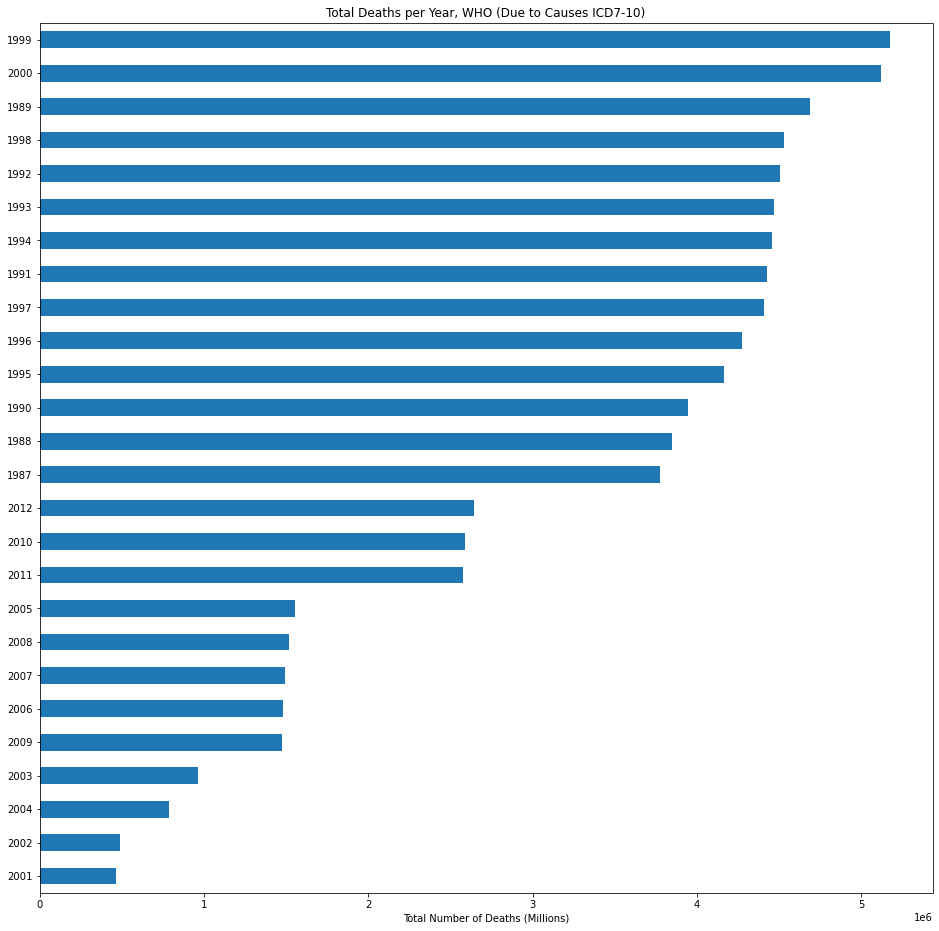

In [736]:
# plot of death stats over time
plt.figure(figsize=(16,16))
mort.groupby('year').all_ages_deaths.sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Deaths per Year, WHO (Due to Causes ICD7-10)')
plt.xlabel('Total Number of Deaths (Millions)')
plt.ylabel(None)
plt.show()

To begin, I wanted to take a look at the Total Number of Deaths by Year because I wanted to get a sense of the distribution of these fatalities over the time period I working with, and possibly use this distribution as a point to start analyzing the context of this data and the global events occuring during this years that msy by shaping some of these deaths. From pooking at the chart, I would hypothesize that the top 5 years that would be the most interesting to look at in terms of events alongside this data would be *1999, 2000, 2012, 2010 and 2011*.

In [756]:
# plot of death by gender over time
plt.figure(figsize=(16,8))
mort.groupby('bio_sex').all_ages_deaths.sum().sort_values(ascending=True).plot(kind='bar')
plt.title('Biological Sex of the Deceased')
plt.ylabel('Total Number of Deaths Worldwide (10 Millions)')
plt.xlabel("Gender (1 = male, 2 = female)")
plt.show()

I found it to be very surprising that, according to this data, a majority of the total fatalities in this time period were males. In thinking about it from a broader perspective though, one very relevant reason why I thought this might be the case is that we as humans have been socialized throughout to associated the more labor-intense jobs with males. With these jobs come a risk of injury and/or death, and if men are pushed to do these jobs and overexert themselves as a normal activity, this would make them more prone to injury and fatality depending on their pain tolerance. I have noticed that many of the men I know have also been socialized to work through the pain, ignore what their bodies and tolerance levels are telling them, and "man up." If this is a trend tha holds in more places in the world, then it actually makes sence that men would, on average, put themselves in dangerous situations moreso than women.

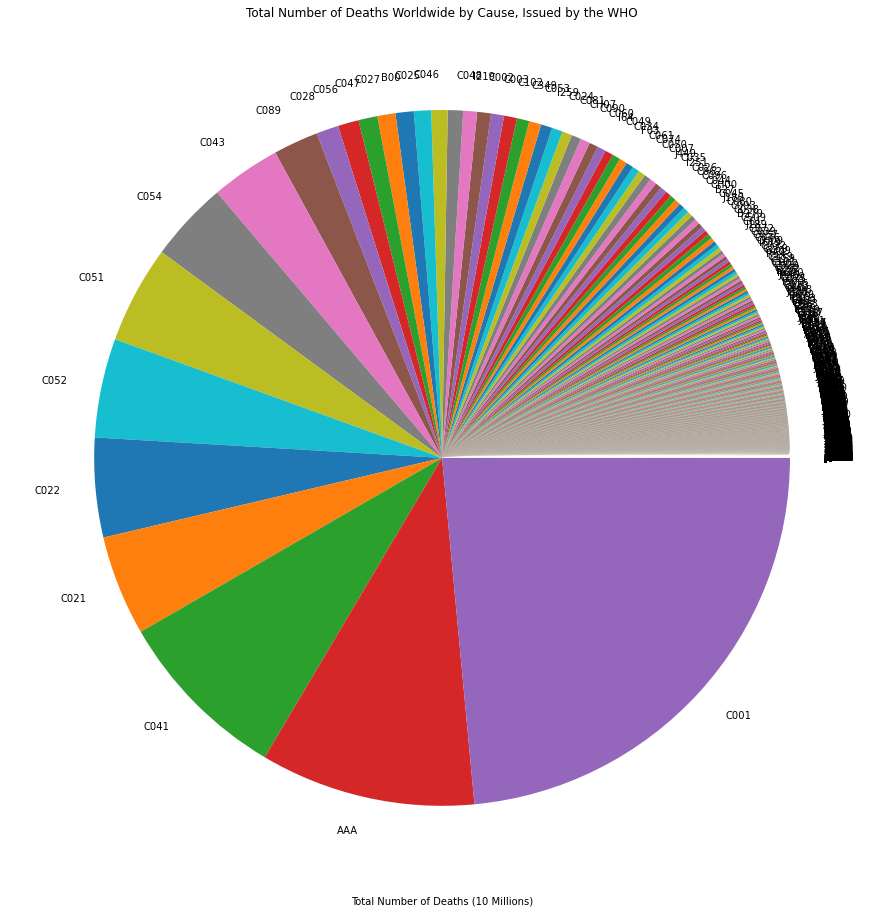

In [805]:
# plot of causes of death globally over the time period
plt.figure(figsize=(16,16))
mort.groupby('death_cause').all_ages_deaths.sum().sort_values(ascending=True).plot(kind='pie')
plt.title('Total Number of Deaths Worldwide by Cause, Issued by the WHO')
plt.xlabel('Total Number of Deaths (10 Millions)')
plt.ylabel(None)
plt.show()

Looking at this pie chart, it is apparent to me that the top 18, most prominent causes of death globally during this timeframe were as follows:
1. *C001 - All causes*
2. *AAA - All misc. cases in total*
3. C041 - Diseases of the circulatory system
4. C021 - Neoplasms
5. C022 - Malignant neoplasms
6. C052 - Disease of the respiratory system
7. C051 - Cerebrovascular disease
8. C054 - Bronchitis, chronic and unspecified emphysema and asthma
9. C043 - Heart diseases
10. C089 - External causes of injury and poisoning
11. C028 - Mal. neoplasm of trachea, bronchus and lung
12. C056 - Disease of digestive system
13. C047 - Other ischaemic heart disease
14. C027 - Mal. neoplasm of liver
15. B00 - Remainder of certain infectious and parasitic diseases
16. C025 - Mal. neoplasm of stomac
17. C046 - Acute myocardial infarction
18. C048 - Pulmonary heart disease

Seeing this data makes me think about . An important note that will remain important for the entire project is that the data on the death's occurring in China, according to the World Health Organization ("WHO"), are "only for selected urban and rural areasband represent less than 10% of all deaths occurring in the country." This is a prime example of sampling bias, and so while my data for the economic situation in China will be more holistic, I will have to exercise caution in relating the data from China's economic growth to China's death statistic. This is not to say that the other countries have perfect one-to-one data mappings, in fact I want to use my limitations section to touch upon this and plan how to make a meaningful anaylsis section knowing that these are the challenges.

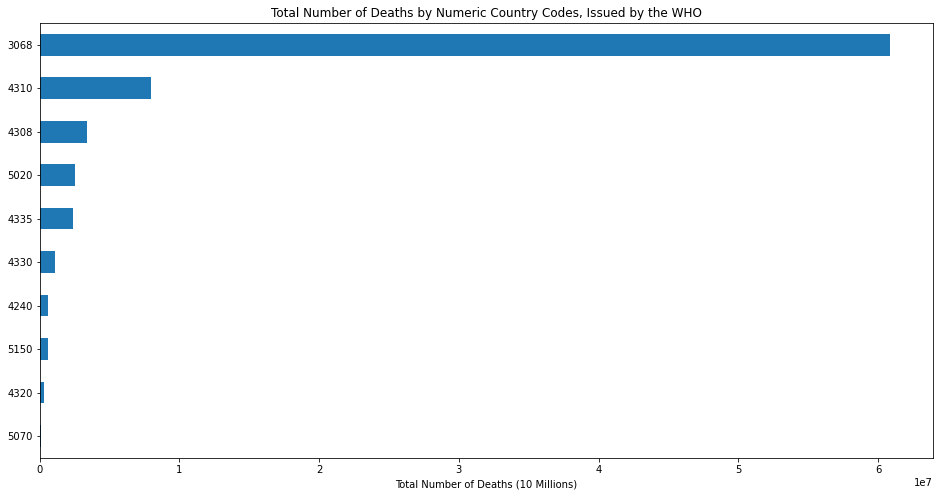

In [749]:
# plot of death by country (code) over the time period
plt.figure(figsize=(16,8))
mort.groupby('country_id').all_ages_deaths.sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Number of Deaths by Numeric Country Codes, Issued by the WHO')
plt.xlabel('Total Number of Deaths (10 Millions)')
plt.ylabel(None)
plt.show()

In [757]:
print("Top 5 Countries in Terms of Total Mortality (from codeKey Table)")
print("3068 = " + codeKey.at[str(3068), 'country'])
print("4310 = " + codeKey.at[str(4310), 'country'])
print("4308 = " + codeKey.at[str(4308), 'country'])
print("5020 = " + codeKey.at[str(5020), 'country'])
print("4335 = " + codeKey.at[str(4335), 'country'])

Top 5 Countries in Terms of Total Mortality (from codeKey Table)
3068 = China
4310 = United Kingdom, England and Wales
4308 = United Kingdom
5020 = Australia
4335 = Uzbekistan


Using the *codeKey* table, I linked the entries to their names. According to this chart above, the five countries with the most total deaths from 1999 to 2012 were 
1. **China**
2. **United Kingdom, England and Wales**
3. **United Kingdom**
4. **Australia**
5. **Uzbekistan**

Seeing these results caused me to assess my own bias about what is going on in the world and what challenges each nation's health care system is facing. Before looking at this data, I would have assumed that the Mali, China, and Iraq, and other countries that are either predominately inhabited by people of color of are considered third-world countries would be in the top 5 due to the stories that I have seen in the media, and the way that those have socialized me to think of the "first world" countries as the safest. Among other things, I will definitely be exploring what this data shows about the stories that I, and many others, have been told about standards of living and circumstances of death in other countries. After making these connections, I decided to explore the trends in economic growth for each of these countries in comparison to global economic growth so that I can see how GDP grows percentage-wise in each of these countries for every 1% increase in GDP worldwide.

In [ ]:
gdpYears["China"] = gdpYears["China"].astype('float')
gdpYears["European Union"] = gdpYears["European Union"].astype('float')
gdpYears["United Kingdom"] = gdpYears["United Kingdom"].astype('float')
gdpYears["Australia"] = gdpYears["Australia"].astype('float')
gdpYears["Uzbekistan"] = gdpYears["Uzbekistan"].astype('float')
gdpYears["World"] = gdpYears["World"].astype('float')
plt.figure(figsize=(16,16))

gdpYears.plot(x="World", y="China", kind="scatter")
plt.title('Economic Growth Relative to the rest of the World, Issued by the World Bank')
plt.ylabel('China GDP Growth (%)')
plt.xlabel("World GDP Growth (%)")
x1 = gdpYears["World"]
y1 = gdpYears["China"]
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"r--")

gdpYears.plot(x="World", y="European Union", kind="scatter")
plt.title('Economic Growth Relative to the rest of the World, Issued by the World Bank')
plt.ylabel('European Union GDP Growth (%)')
plt.xlabel("World GDP Growth (%)")
x2 = gdpYears["World"]
y2 = gdpYears["European Union"]
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r--")

gdpYears.plot(x="World", y="United Kingdom", kind="scatter")
plt.title('Economic Growth Relative to the rest of the World, Issued by the World Bank')
plt.ylabel('United Kingdom GDP Growth (%)')
plt.xlabel("World GDP Growth (%)")
x3 = gdpYears["World"]
y3 = gdpYears["United Kingdom"]
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"r--")

gdpYears.plot(x="World", y="Australia", kind="scatter")
plt.title('Economic Growth Relative to the rest of the World, Issued by the World Bank')
plt.ylabel('Australia GDP Growth (%)')
plt.xlabel("World GDP Growth (%)")
x4 = gdpYears["World"]
y4 = gdpYears["United Kingdom"]
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"r--")

gdpYears.plot(x="World", y="Uzbekistan", kind="scatter")
plt.title('Economic Growth Relative to the rest of the World, Issued by the World Bank')
plt.ylabel('Uzbekistan GDP Growth (%)')
plt.xlabel("World GDP Growth (%)")
x5 = gdpYears["World"]
y5 = gdpYears["United Kingdom"]
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"r--")

plt.show()

#correlation
print("The correlation between the World GDP growth and China's GDP growth is: " + str(round(gdpYears["World"].corr(gdpYears["China"]), 2)))
print("The correlation between the World GDP growth and European Union's GDP growth is: " + str(round(gdpYears["World"].corr(gdpYears["European Union"]), 2)))
print("The correlation between the World GDP growth and United Kingdom's GDP growth is: " + str(round(gdpYears["World"].corr(gdpYears["United Kingdom"]), 2)))
print("The correlation between the World GDP growth and Australia's GDP growth is: " + str(round(gdpYears["World"].corr(gdpYears["Australia"]), 2)))
print("The correlation between the World GDP growth and Uzbekistan's GDP growth is: " + str(round(gdpYears["World"].corr(gdpYears["Uzbekistan"]), 2)))

From these results, the correlation between the _World GDP growth and the European Union's GDP growth_ is the **most linearly positive**, while the correlation between _the World GDP growth and Uzbekistan's GDP growth_ is the **least linearly positive**. This makes sense because the trendline and the randomly scattered points that the trendline doesn't seem to run through, and the correlation is nearly equal to 0, I see a lack of a (prominent) relationship between Uzbekistan's GDP Growth Rate and the World Growth Rate. This suggests that something else may be going on with Uzbekistan that is driving their economic growth without significant impact from or being impacted by global economic growth, and that might provide a clue as to what is driving the leading cause of death in Uzbekistan.

Now seeing the trend in GDP Growth for every percent increase in GDP globally, I believe that I have a better sense of an estimation of how each country may perform economically given a global GDP increase of decrease. This is insight to me because it answers some questions, such as the incoem levels of the countryes that saw the most deaths in this time period, and what were the most common causes of death globally, how many were male vs. female, and more. But it has also left me with new questions, like what were the factors driving this economic growth for these countries, as well as the 5 countries with lowest number of total deaths in this time period, and how, if at all, could those potentially be linked to causes of death? To what extent were these factors contained within country boarders? Overall, this data has really fostered my curiosity.

From these results, the correlation between the _World GDP growth and the European Union's GDP growth_ is the **most linearly positive**, while the correlation between _the World GDP growth and Uzbekistan's GDP growth_ is the **least linearly positive**. This makes sense because the trendline and the randomly scattered points that the trendline doesn't seem to run through, and the correlation is nearly equal to 0, I see a lack of a (prominent) relationship between Uzbekistan's GDP Growth Rate and the World Growth Rate. This suggests that something else may be going on with Uzbekistan that is driving their economic growth without significant impact from or being impacted by global economic growth, and that might provide a clue as to what is driving the leading cause of death in Uzbekistan.

Now seeing the trend in GDP Growth for every percent increase in GDP globally, I believe that I have a better sense of an estimation of how each country may perform economically given a global GDP increase of decrease. This is insight to me because it answers some questions, such as the incoem levels of the countryes that saw the most deaths in this time period, and what were the most common causes of death globally, how many were male vs. female, and more. But it has also left me with new questions, like what were the factors driving this economic growth for these countries, as well as the 5 countries with lowest number of total deaths in this time period, and how, if at all, could those potentially be linked to causes of death? To what extent were these factors contained within country boarders? Overall, this data has really fostered my curiosity.

In [23]:
# Plot Total of Deaths for Each Country vs % Change in GDP, Ordered by most to least reported deaths
# Get Death Totals by Year. The WHO leaves unknown entries blank
# Get Economic Data
# China
death_cn_yr = death_cn.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
eg_cn = economic_growth.iloc[1,2:16].sort_index()
c = zip(death_cn_yr.tolist(),eg_cn.tolist())
china = pd.DataFrame(c, index=death_cn_yr.index)
china.columns = ["death_total", "economic_growth"]
china['death_total'] = china['death_total'].fillna(0)
# Australia
death_aus_yr = death_aus.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0], index=[1999, 2000, 2001, 2002, 2005])).sort_index()
eg_aus = economic_growth.iloc[0,2:16].sort_index()
a = zip(death_aus_yr.tolist(),eg_aus.tolist())
australia = pd.DataFrame(a, index=death_aus_yr.index)
australia.columns = ["death_total", "economic_growth"]
australia['death_total'] = australia['death_total'].fillna(0)
# The UK
death_uk_yr = death_uk.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])).sort_index()
eg_uk = economic_growth.iloc[3,2:16].sort_index()
uk = zip(death_uk_yr.tolist(),eg_uk.tolist())
united_kingdom = pd.DataFrame(uk, index=death_uk_yr.index)
united_kingdom.columns = ["death_total", "economic_growth"]
united_kingdom['death_total'] = united_kingdom['death_total'].fillna(0)
# Uzbekistan
death_uzb_yr = death_uzb.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
eg_uzb = economic_growth.iloc[5,2:16].sort_index()
uzb = zip(death_uzb_yr.tolist(),eg_uzb.tolist())
uzbekistan = pd.DataFrame(uzb, index=death_uzb_yr.index)
uzbekistan.columns = ["death_total", "economic_growth"]
uzbekistan['death_total'] = uzbekistan['death_total'].fillna(0)
# Portugal
death_por_yr = death_por.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
eg_por = economic_growth.iloc[4,2:16].sort_index()
p = zip(death_por_yr.tolist(),eg_por.tolist())
portugal = pd.DataFrame(p, index=death_por_yr.index)
portugal.columns = ["death_total", "economic_growth"]
portugal['death_total'] = portugal['death_total'].fillna(0)
# Fiji
death_fji_yr = death_fji.groupby(by="year").sum().all_ages_deaths.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012])).sort_index()
eg_fji = economic_growth.iloc[2,2:16].sort_index()
fji = zip(death_fji_yr.tolist(),eg_fji.tolist())
fiji = pd.DataFrame(fji, index=death_fji_yr.index)
fiji.columns = ["death_total", "economic_growth"]
fiji['death_total'] = fiji['death_total'].fillna(0)

In [24]:
# how bio_sex deaths change with economic growth
# LogisticRegression from Lecture 3/24
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

In [25]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# China
cndata = death_cn.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
bio_sex_model_cn = LogisticRegression().fit(china[['economic_growth']], cndata)
print(bio_sex_model_cn.coef_, bio_sex_model_cn.intercept_)
m = bio_sex_model_cn.coef_[0][0]
b = bio_sex_model_cn.intercept_[0]
y = m * 5 + b 
print('Probability of death by female sex given 5% or more economic growth in China:', logit(y))
bio_sex_model_cn.predict_proba(np.array([[5]]))

[[-0.57002022]] [3.43076485]
Probability of death by female sex given 5% or more economic growth in China: 0.6412201237274195


array([[0.35877988, 0.64122012]])

In [26]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# Australia
ausdata = death_aus.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0], index=[1999, 2000, 2001, 2002, 2005])).sort_index()
bio_sex_model_aus = LogisticRegression().fit(australia[['economic_growth']], ausdata)
print(bio_sex_model_aus.coef_, bio_sex_model_aus.intercept_)
m = bio_sex_model_aus.coef_[0][0]
b = bio_sex_model_aus.intercept_[0]
y = m * 5 + b 
print('Probability of death by female sex given 5% or more economic growth in Australia:', logit(y))
bio_sex_model_aus.predict_proba(np.array([[5]]))

[[ 0.52184154]
 [ 0.25496769]
 [-0.36765448]
 [-0.35388121]
 [-0.05527355]] [-0.84842854 -0.85456387  1.95766298  0.30952819 -0.56419876]
Probability of death by female sex given 5% or more economic growth in Australia: 0.8533072165651479


array([[0.63713463, 0.16674679, 0.12341991, 0.02544003, 0.04725863]])

In [27]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# United Kingdom
ukdata = death_uk.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])).sort_index()
bio_sex_model_uk = LogisticRegression().fit(united_kingdom[['economic_growth']], ukdata)
print(bio_sex_model_uk.coef_, bio_sex_model_uk.intercept_)
m = bio_sex_model_uk.coef_[0][0]
b = bio_sex_model_uk.intercept_[0]
y = m * 5 + b # predict twenty deaths sexes
print('Probability of death by female sex given 5% or more economic growth in United Kingdom:', logit(y))
bio_sex_model_uk.predict_proba(np.array([[5]]))

[[-0.26561186]
 [ 0.55668041]
 [-0.29106855]] [ 1.85426052 -2.55040255  0.69614203]
Probability of death by female sex given 5% or more economic growth in United Kingdom: 0.6285966754203829


array([[0.49445932, 0.36880319, 0.13673749]])

In [28]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# Uzbekistan
uzbdata = death_uzb.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
bio_sex_model_uzb = LogisticRegression().fit(uzbekistan[['economic_growth']], uzbdata)
print(bio_sex_model_uzb.coef_, bio_sex_model_uzb.intercept_)
m = bio_sex_model_uzb.coef_[0][0]
b = bio_sex_model_uzb.intercept_[0]
y = m * 5 + b
print('Probability of death by female sex given 5% or more economic growth in Uzbekistan:', logit(y))
bio_sex_model_uzb.predict_proba(np.array([[5]]))

[[-1.47419206]] [7.90191301]
Probability of death by female sex given 5% or more economic growth in Uzbekistan: 0.6297052833989257


array([[0.37029472, 0.62970528]])

In [29]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# Portugal
pordata = death_por.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
bio_sex_model_por = LogisticRegression().fit(portugal[['economic_growth']], pordata)
print(bio_sex_model_por.coef_, bio_sex_model_por.intercept_)
m = bio_sex_model_por.coef_[0][0]
b = bio_sex_model_por.intercept_[0]
y = m * 5 + b 
print('Probability of death by female sex given 5% or more economic growth in Portugal:', logit(y))
bio_sex_model_por.predict_proba(np.array([[5]]))

[[1.16857101]] [-3.55744547]
Probability of death by female sex given 5% or more economic growth in Portugal: 0.9076614369606772


array([[0.09233856, 0.90766144]])

In [30]:
# RUN TO PLOT
# plot the logistic function for bio_sex of the death dataset
# Fiji
fjidata = death_fji.groupby(by="year").sum().bio_sex.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012])).sort_index()
bio_sex_model_fji = LogisticRegression().fit(fiji[['economic_growth']], fjidata)
print(bio_sex_model_fji.coef_, bio_sex_model_fji.intercept_)
m = bio_sex_model_fji.coef_[0][0]
b = bio_sex_model_fji.intercept_[0]
y = m * 5 + b 
print('Probability of death by female sex given 5% or more economic growth in Fiji:', logit(y))
bio_sex_model_fji.predict_proba(np.array([[5]]))

[[-0.50129739]
 [-0.15944429]
 [ 0.66074168]] [ 3.69592142  0.54134105 -4.23726247]
Probability of death by female sex given 5% or more economic growth in Fiji: 0.7666399022722425


array([[0.73781935, 0.17388326, 0.08829738]])

In [31]:
# RUN TO PLOT
#Age Groups and economic growth dist
# Data
plt.figure(figsize=(11,8))
fjidata_age = death_fji.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2012])).sort_index()
pordata_age = death_por.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
uzbdata_age = death_uzb.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
ukdata_age = death_uk.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])).sort_index()
ausdata_age = death_aus.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0], index=[1999, 2000, 2001, 2002, 2005])).sort_index()
cndata_age = death_cn.groupby(by="year").mean().age_group_def.append(pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], index=[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012])).sort_index()
#Graph
plt.bar(fjidata_age, fiji.economic_growth, label = "FJI")
plt.bar(pordata_age, fiji.economic_growth, label = "POR")
plt.bar(uzbdata_age, fiji.economic_growth, label = "UZB")
plt.bar(ukdata_age, fiji.economic_growth, label = "UK")
plt.bar(ausdata_age, fiji.economic_growth, label = "AUS")
plt.bar(cndata_age, fiji.economic_growth, label = "CN")
plt.xlabel('Age Group of Deaths Occurred')
# Set the y axis label of the current axis.
plt.ylabel('% GDP Growth')
# Set a title of the current axes.
plt.title('Trends in Economic Growth vs. Deaths by Age')
plt.legend()
plt.show()